In [1]:
#loading the packages and directory

import os
import pandas as pd
import numpy as np
import scipy.spatial
from sklearn.preprocessing import StandardScaler
import scipy as sci
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

os.chdir("C:/Users/Windows 10/.spyder-py3/lavoro algoritmi")


In [2]:
#setting up the dataframe

colnames = ["CustomerID", "Gender", "Age", "Annual_income", "Spending_score"]
data = pd.read_csv("Mall_customers.csv", names=colnames, sep=";")
income=data.Annual_income.tolist()
score=data.Spending_score.tolist()
df = pd.DataFrame({
    'x': income,
    'y': score
})



mall = pd.read_csv('Mall_customers.csv', sep=';', header=None)

n,q = mall.shape
c = list(mall.columns.values)
p = q-1
X = mall.as_matrix(c[3:5])

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:
#DBSCAN function

def dbscan(X,min_size_cluster,dist_neighbor):
    # min_size_cluster : minimum number of points in each cluster
    # dist_neighbor : radius of neighborhood
    n,_ = X.shape
    kdtree = scipy.spatial.KDTree(X)
    X_visit = np.zeros((n,1),dtype=bool)
    clusters = np.zeros((n,1))
    c = 0
    for k in range(0,n):
        if X_visit[k]==0: 
            X_visit[k] = 1 
            Neighbors = kdtree.query_ball_point(X[k,:],dist_neighbor)
#            
            if len(Neighbors)<min_size_cluster:
                clusters[k] = -1
            else:
                c = c+1
                clusters[k] = c 
                while len(Neighbors)>0: 
                    i = Neighbors.pop()
                    if X_visit[i]==0:   
                        X_visit[i] = 1
                        Vi = kdtree.query_ball_point(X[i,:],dist_neighbor) 
                        if len(Vi)>=min_size_cluster: 
                            Neighbors.extend(Vi)
                    if clusters[i]<=0:
                        clusters[i] = c
            
    return clusters

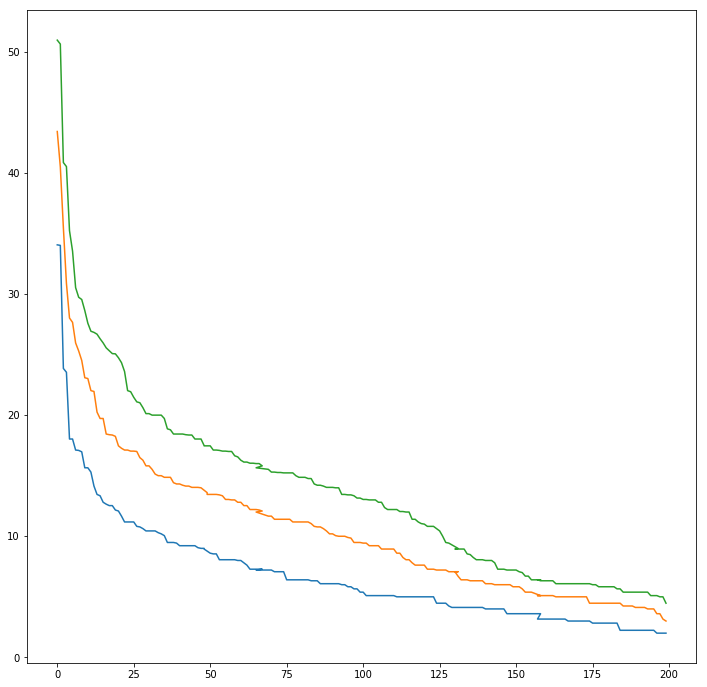

In [4]:
#Finding the optimal number of points per cluster using the nearest neighbors

plt.figure(figsize=(12, 12)) 
for min_size_cluster in (5,10,15):
       nbrs = NearestNeighbors(n_neighbors=min_size_cluster).fit(df)
       distances, indices = nbrs.kneighbors(df)
       distanceDec = sorted(distances[:,min_size_cluster-1], reverse=True)
             
       plt.plot(indices[:,0], distanceDec)

In [5]:
#Silhouette score for (5,10)
dist_neighbor = 10
min_size_cluster = 5
output = dbscan(X,min_size_cluster,dist_neighbor)
silhouette_score (X, output, metric='euclidean')

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41249187303464097

In [6]:
#Silhouette score for (10,15)
dist_neighbor = 15
min_size_cluster = 10
output = dbscan(X,min_size_cluster,dist_neighbor)
silhouette_score (X, output, metric='euclidean')

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39784804929714007

In [8]:
#Setting the input for the dbscan function
import time
start = time.time()

min_size_cluster = 5
dist_neighbor = 10
output = dbscan(X,min_size_cluster,dist_neighbor)
#print(output)
end = time.time()
print(end - start)

0.2234025001525879


Text(0,0.5,'Score')

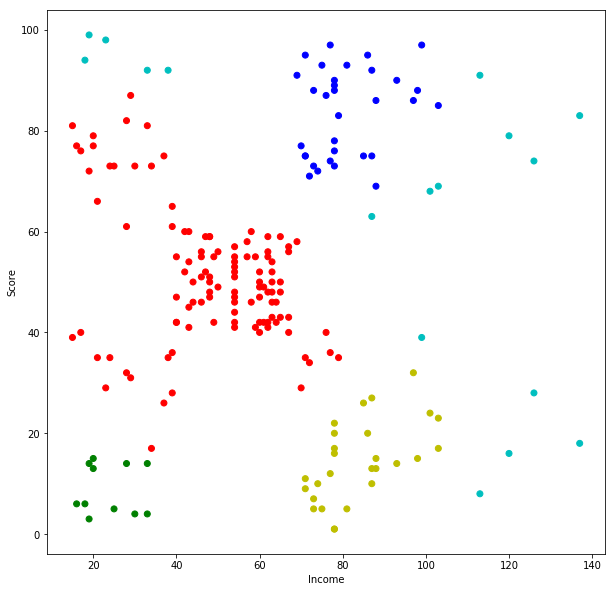

In [9]:
#setting the colors for the plot

vector=["none"]*len(output)

for i in range(0,len(output)):
    
        if int(output[i][0])==1:
            vector[i]="r"
        elif int(output[i][0])==2:
            vector[i]="g"
        elif int(output[i][0])==3:
            vector[i]="b"
        elif int(output[i][0])==4:
            vector[i]="y"
        else:
            vector[i]="c"   
              

df2 = pd.DataFrame({
    'x': income,
    'y': score,
    "n": vector
})

fig = plt.figure(figsize=(10, 10))           
plt.scatter(df2["x"], df2["y"], color=df2["n"])     
plt.xlabel("Income")
plt.ylabel("Score")